In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [40]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_train.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


**numerical features**

In [41]:
num_col = df_train.select_dtypes(
    exclude=['object']).drop(['id', 'loan_status'], axis=1).columns

df_train_num = df_train[num_col]
df_train_num.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
58640,34,120000,5.0,25000,15.95,0.21,10
58641,28,28800,0.0,10000,12.73,0.35,8
58642,23,44000,7.0,6800,16.00,0.15,2
58643,22,30000,2.0,5000,8.90,0.17,3
58644,31,75000,2.0,15000,11.11,0.20,5


In [45]:
(df_train_num
 .describe()
 .T[['mean', 'max']])

,mean,max
person_age,27.550857,123.00
person_income,64046.172871,1900000.00
person_emp_length,4.701015,123.00
loan_amnt,9217.556518,35000.00
loan_int_rate,10.677874,23.22
loan_percent_income,0.159238,0.83
cb_person_cred_hist_length,5.813556,30.00


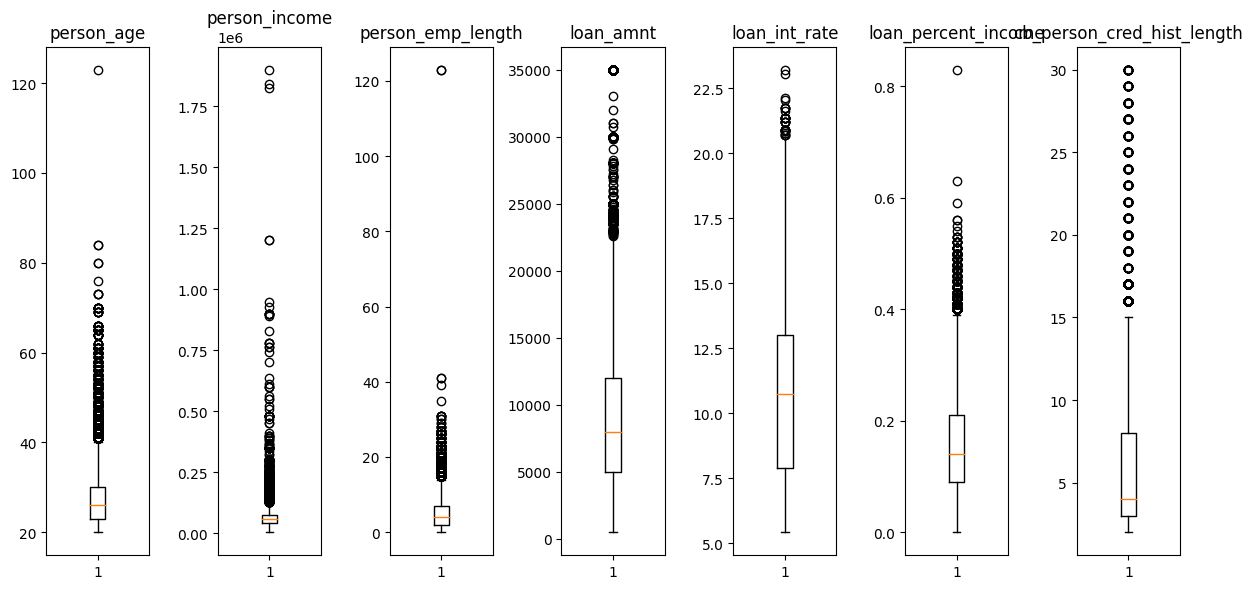

In [50]:
fig, axes = plt.subplots(1, 7, figsize=(12, 6))  # 1 linha, 3 colunas

for i, col in enumerate(df_train_num.columns):
    axes[i].boxplot(df_train_num[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

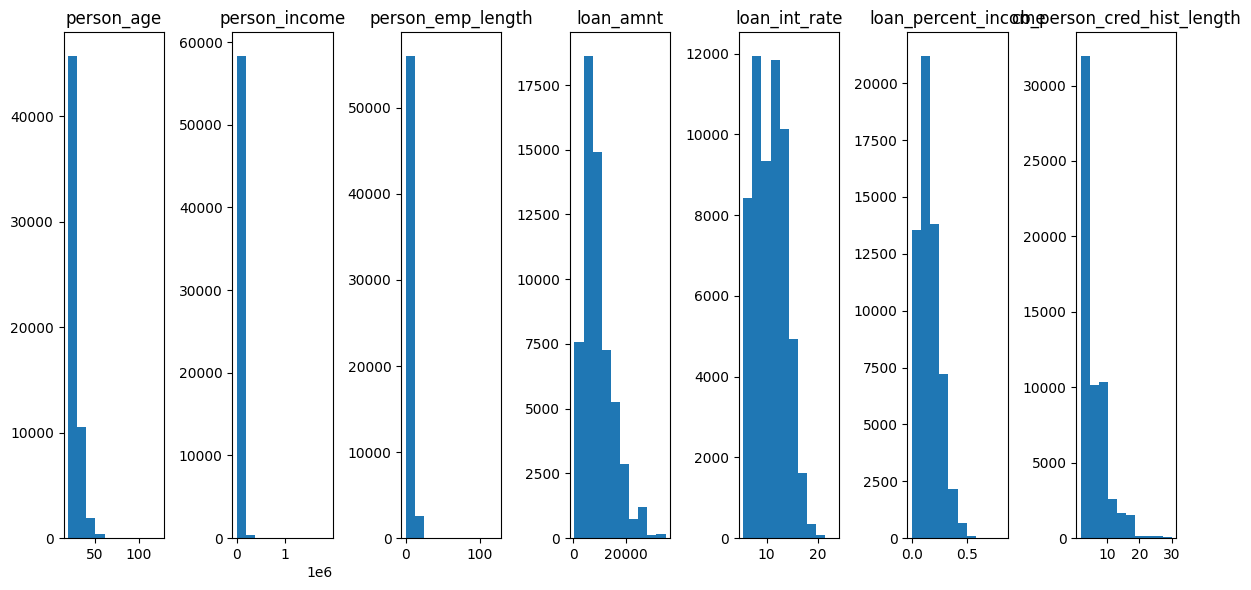

In [64]:
fig, axes = plt.subplots(1, 7, figsize=(12, 6))  # 1 linha, 3 colunas

for i, col in enumerate(df_train_num.columns):
    axes[i].hist(df_train_num[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

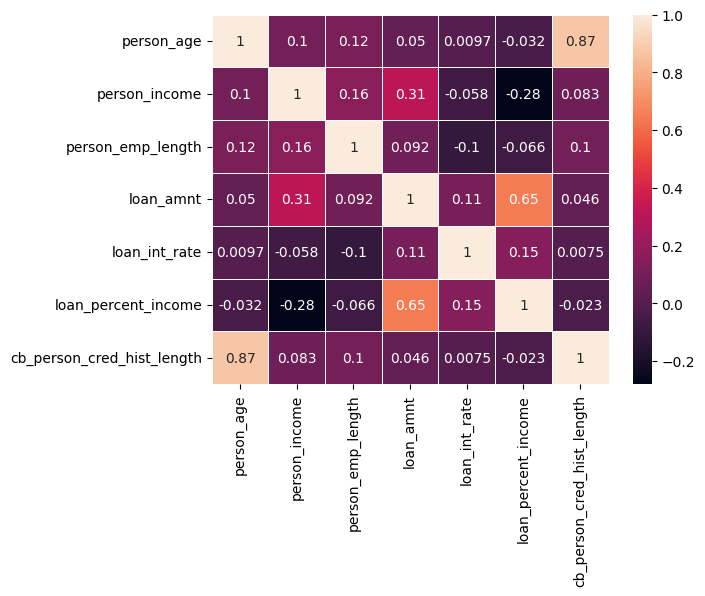

In [66]:
sns.heatmap(df_train_num.corr(), annot=True, linewidth=.5);